In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [5]:
data_dir='data'

In [6]:
dataset=keras.preprocessing.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    batch_size=32,
    image_size=(256, 256),
    )

Found 4188 files belonging to 4 classes.


In [15]:
ds_size=len(dataset)

In [16]:
train=dataset.take(int(ds_size*0.8))
test=dataset.skip(int(ds_size*0.8)).take(int(ds_size*0.1))
val=dataset.skip(int(ds_size*0.8+ds_size*0.1))

In [18]:
len(train),len(test),len(val)

(104, 13, 14)

In [19]:
class_names=dataset.class_names

In [20]:
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

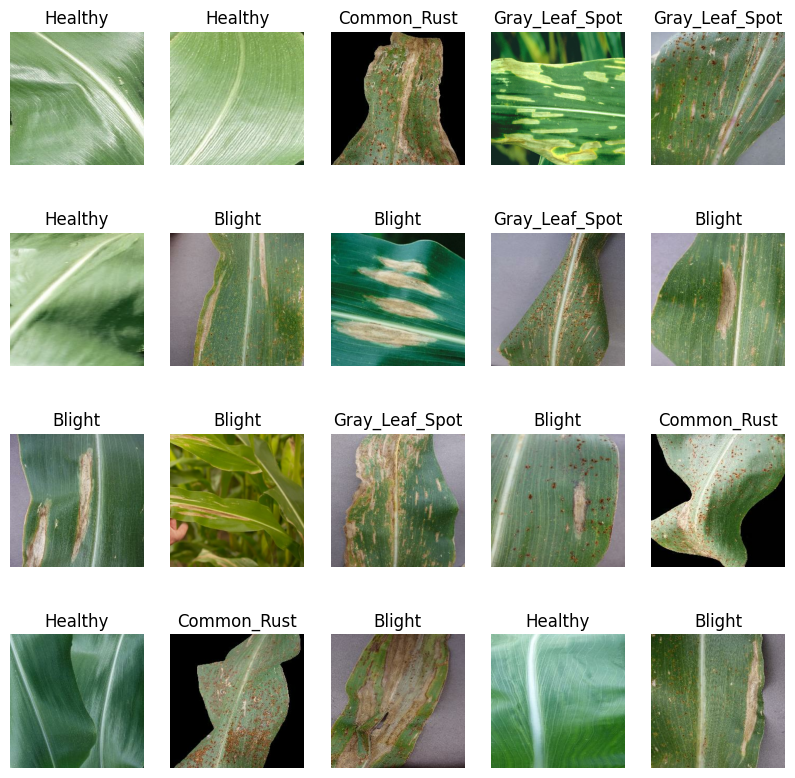

In [25]:
# visualizing images
plt.figure(figsize=(10,10))
for image,label in train.take(1):
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        title=class_names[label[i].numpy()]
        plt.title(title)
        plt.axis('off')

In [23]:
label

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0,
       3, 3, 2, 3, 0, 0, 1, 1, 3, 0])>

In [26]:
scaling_layer=keras.Sequential([
    keras.layers.Resizing(256,256),
    keras.layers.Rescaling(1.0/255)
])

In [27]:
model=keras.Sequential()
model.add(scaling_layer)
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,256,256,3)))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(4,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.build(input_shape=(32,256,256,3))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 32)         

In [29]:
model_history=model.fit(train,epochs=10,batch_size=32,validation_data=val)

Epoch 1/10
104/104 [==============================] - 402s 4s/step - loss: 0.6939 - accuracy: 0.7100 - val_loss: 0.3946 - val_accuracy: 0.8401
Epoch 2/10
104/104 [==============================] - 377s 4s/step - loss: 0.3813 - accuracy: 0.8450 - val_loss: 0.4522 - val_accuracy: 0.8041
Epoch 3/10
104/104 [==============================] - 373s 4s/step - loss: 0.3345 - accuracy: 0.8624 - val_loss: 0.3869 - val_accuracy: 0.8221
Epoch 4/10
104/104 [==============================] - 372s 4s/step - loss: 0.2883 - accuracy: 0.8801 - val_loss: 0.3553 - val_accuracy: 0.8356
Epoch 5/10
104/104 [==============================] - 372s 4s/step - loss: 0.3101 - accuracy: 0.8714 - val_loss: 0.3394 - val_accuracy: 0.8716
Epoch 6/10
104/104 [==============================] - 384s 4s/step - loss: 0.2340 - accuracy: 0.9078 - val_loss: 0.2923 - val_accuracy: 0.8806
Epoch 7/10
104/104 [==============================] - 379s 4s/step - loss: 0.2526 - accuracy: 0.9029 - val_loss: 0.3275 - val_accuracy: 0.8626

In [30]:
model.save('corn_disease_model.keras')
import pickle
pickle.dump(model_history,open('model_history.pkl','wb'))


In [31]:
model.evaluate(test)

13/13 [==============================] - 17s 774ms/step - loss: 0.2899 - accuracy: 0.8846


[0.28993040323257446, 0.8846153616905212]

In [33]:
model_history2=model.fit(train,epochs=5,batch_size=32,validation_data=val)

Epoch 1/5
104/104 [==============================] - 486s 5s/step - loss: 0.1295 - accuracy: 0.9555 - val_loss: 0.3411 - val_accuracy: 0.8604
Epoch 2/5
104/104 [==============================] - 491s 5s/step - loss: 0.0930 - accuracy: 0.9663 - val_loss: 0.3960 - val_accuracy: 0.8784
Epoch 3/5
104/104 [==============================] - 456s 4s/step - loss: 0.0905 - accuracy: 0.9681 - val_loss: 0.4938 - val_accuracy: 0.8626
Epoch 4/5
104/104 [==============================] - 374s 4s/step - loss: 0.1016 - accuracy: 0.9688 - val_loss: 0.4261 - val_accuracy: 0.8378
Epoch 5/5
104/104 [==============================] - 377s 4s/step - loss: 0.0811 - accuracy: 0.9769 - val_loss: 0.4263 - val_accuracy: 0.8671


In [34]:
model.evaluate(test)

13/13 [==============================] - 18s 806ms/step - loss: 0.2528 - accuracy: 0.9135


[0.25277239084243774, 0.9134615659713745]

In [35]:
model.save('corn_model2.keras')

In [36]:
model_history.history

{'loss': [0.6939000487327576,
  0.38134732842445374,
  0.33446547389030457,
  0.28826552629470825,
  0.3100750148296356,
  0.23397013545036316,
  0.2526017427444458,
  0.2002396285533905,
  0.25114691257476807,
  0.16299006342887878],
 'accuracy': [0.710036039352417,
  0.8449519276618958,
  0.862379789352417,
  0.8801081776618958,
  0.8713942170143127,
  0.9077523946762085,
  0.9029446840286255,
  0.9263821840286255,
  0.9041466116905212,
  0.9381009340286255],
 'val_loss': [0.3946499824523926,
  0.452228307723999,
  0.38692453503608704,
  0.35530269145965576,
  0.33939674496650696,
  0.29231932759284973,
  0.32747286558151245,
  0.2906007170677185,
  0.3038562834262848,
  0.3404628038406372],
 'val_accuracy': [0.8400900959968567,
  0.8040540814399719,
  0.8220720887184143,
  0.8355855941772461,
  0.8716216087341309,
  0.880630612373352,
  0.8626126050949097,
  0.8963963985443115,
  0.8761261105537415,
  0.8761261105537415]}

In [37]:
model_history2.history

{'loss': [0.12946929037570953,
  0.09301984310150146,
  0.09052196890115738,
  0.10160093009471893,
  0.0811132937669754],
 'accuracy': [0.9555288553237915,
  0.9663461446762085,
  0.9681490659713745,
  0.96875,
  0.9768629670143127],
 'val_loss': [0.3411059081554413,
  0.3960234522819519,
  0.4937969446182251,
  0.42606183886528015,
  0.42634037137031555],
 'val_accuracy': [0.8603603839874268,
  0.8783783912658691,
  0.8626126050949097,
  0.837837815284729,
  0.8671171069145203]}

In [38]:
import seaborn as sns

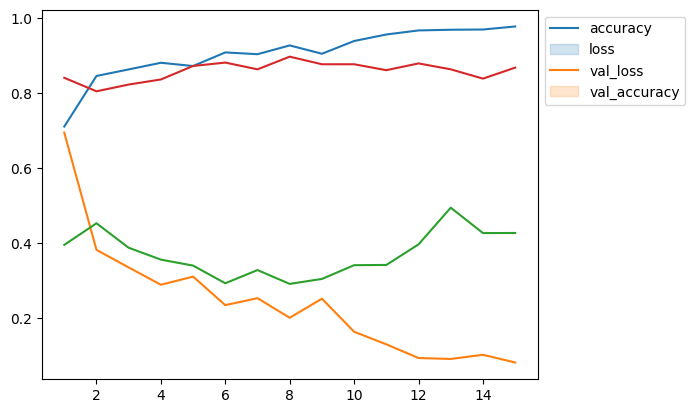

In [47]:
sns.lineplot(x=range(1,15+1),y=model_history.history['accuracy']+model_history2.history['accuracy'])
sns.lineplot(x=range(1,15+1),y=model_history.history['loss']+model_history2.history['loss'])
sns.lineplot(x=range(1,15+1),y=model_history.history['val_loss']+model_history2.history['val_loss'])
sns.lineplot(x=range(1,15+1),y=model_history.history['val_accuracy']+model_history2.history['val_accuracy'])
plt.legend(labels=["accuracy","loss","val_loss",'val_accuracy'],loc='upper left', bbox_to_anchor=(1, 1))